<a href="https://colab.research.google.com/github/prasad209/hello-world/blob/main/Introduction_to_Data_Visualization_PK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> A Picture is worth a thousand words! </b></u>

## <b> Introducing Matplotlib and Seaborn for data visualization

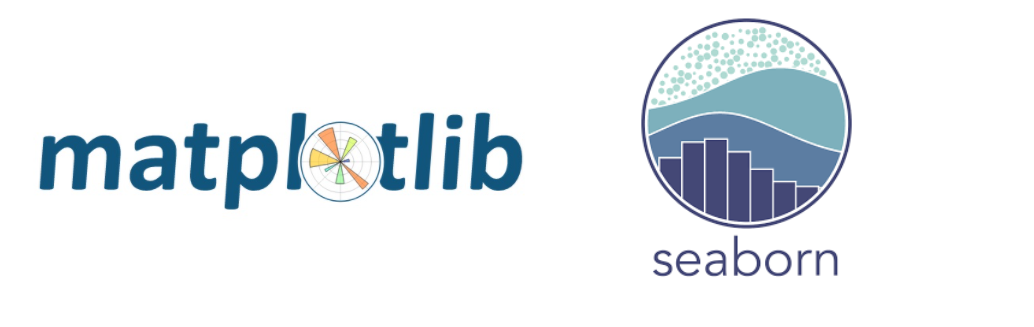

## Matplotlib.Pyplot
* One of the core aspects of Matplotlib is matplotlib.pyplot. It is Matplotlib's scripting layer. It is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. We will work both with the scripting and artist layer.

## Let's jump directly onto the data which we will use today for demonstrating the utiltiies of Matplotlib 

* Price Paid Data tracks the residential property sales in England and Wales that are lodged with HM Land Registry for registration.

* The dataset is a reliable source of house price information and consists of more than a million definitive records for the annual year 2018

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pandas 
import pandas as pd

In [ ]:
# Define the path where data is kept
path = "/content/drive/MyDrive/pp-2018.csv"

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/pp-2018.csv", names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


### Below is a description of the columns/variables in our Price Paid data

* Transaction unique identifier --- A reference number which is generated automatically recording each published sale. 
                                The number is unique and will change each time a sale is recorded.
* Price ---- Sale price stated on the transfer deed.
* Date of Transfer ---- Date when the sale was completed, as stated on the transfer deed.
* Postcode ---- This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated    and these changes are not reflected in the Price Paid Dataset.
* Property Type ---- D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
* Newly built  ----- Y = a newly built property, N = an established residential building
* Duration	Relates to the tenure: F = Freehold, L= Leasehold etc.

* Street
* Locality 
* Town/City 
* District
* County 
* PPD Category Type ---- Indicates the type of Price Paid transaction.

* Record Status - monthly file only --- Indicates additions, changes and deletions to the records.(see guide below).
                                    A = Addition, C = Change, D = Delete.



In [ ]:
df.shape

(1024432, 16)

* Next we will filter the data to get all the transaction for a particular year and month ( say July 2018 for example). We will only keep transactions of type "A" (Additions) in the data frame and get rid of Changes and Deletions. And for the sake of simplicity we will also remove transactions for property type "O" (Other) and focus only on Detached ("D"), Semi Detached ("S"), Flats ("F") and Terraced ("T") houses.

In [ ]:
df=df[df['Record Status']=='A']
df

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024427,{80E1AA98-9F64-7BF8-E053-6C04A8C00BF2},382500,2018-12-10,BN22 0NF,D,N,F,17,NaN,MEADOWS ROAD,NaN,EASTBOURNE,WEALDEN,EAST SUSSEX,A,A
1024428,{80E1AA98-9F67-7BF8-E053-6C04A8C00BF2},394000,2018-12-20,BN16 2QE,D,N,F,14,NaN,HARSFOLD ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
1024429,{80E1AA98-9F69-7BF8-E053-6C04A8C00BF2},350000,2018-12-14,RH12 2AG,S,N,F,98,NaN,COOTES AVENUE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
1024430,{80E1AA98-9F6A-7BF8-E053-6C04A8C00BF2},346000,2018-12-07,RH10 3AP,S,N,F,9,NaN,DONNE CLOSE,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


In [ ]:
df = df.loc[df['Record Status'] == 'A']
df

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024427,{80E1AA98-9F64-7BF8-E053-6C04A8C00BF2},382500,2018-12-10,BN22 0NF,D,N,F,17,NaN,MEADOWS ROAD,NaN,EASTBOURNE,WEALDEN,EAST SUSSEX,A,A
1024428,{80E1AA98-9F67-7BF8-E053-6C04A8C00BF2},394000,2018-12-20,BN16 2QE,D,N,F,14,NaN,HARSFOLD ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
1024429,{80E1AA98-9F69-7BF8-E053-6C04A8C00BF2},350000,2018-12-14,RH12 2AG,S,N,F,98,NaN,COOTES AVENUE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
1024430,{80E1AA98-9F6A-7BF8-E053-6C04A8C00BF2},346000,2018-12-07,RH10 3AP,S,N,F,9,NaN,DONNE CLOSE,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


In [ ]:
#Select only record type A and property type not "O"
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']
#df[(df["sale Date"].dt.year==2018)]
# Select transactions for 2018
df = df[(df["Sale Date"].dt.year==2018)]

In [ ]:
df.shape

(959003, 16)

In [ ]:
df

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024427,{80E1AA98-9F64-7BF8-E053-6C04A8C00BF2},382500,2018-12-10,BN22 0NF,D,N,F,17,NaN,MEADOWS ROAD,NaN,EASTBOURNE,WEALDEN,EAST SUSSEX,A,A
1024428,{80E1AA98-9F67-7BF8-E053-6C04A8C00BF2},394000,2018-12-20,BN16 2QE,D,N,F,14,NaN,HARSFOLD ROAD,RUSTINGTON,LITTLEHAMPTON,ARUN,WEST SUSSEX,A,A
1024429,{80E1AA98-9F69-7BF8-E053-6C04A8C00BF2},350000,2018-12-14,RH12 2AG,S,N,F,98,NaN,COOTES AVENUE,NaN,HORSHAM,HORSHAM,WEST SUSSEX,A,A
1024430,{80E1AA98-9F6A-7BF8-E053-6C04A8C00BF2},346000,2018-12-07,RH10 3AP,S,N,F,9,NaN,DONNE CLOSE,NaN,CRAWLEY,CRAWLEY,WEST SUSSEX,A,A


## First objective : Obtain the trend of sales volume across months

### Our first step would be to add the below two lines of code for importing the matplotlib.pyplot and to set the output of the plotting to be displayed inline.

* **%matplotlib inline** sets the backend of matplotlib to the 'inline' backend 
* With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [ ]:
#my code
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#we want month
df['Month']=df['Sale Date'].apply(lambda x: x.strftime("%Y-%m-%d")[:7])

In [ ]:
# Create a variable month to denote the transaction month
df['Month']= df['Sale Date'].apply(lambda x: x.strftime("%Y-%m-%d") [:7])

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,2018-01


In [ ]:
monthly_sales=df['Month'].value_counts()


In [ ]:
monthly_sales

2018-08    95382
2018-11    92427
2018-06    90178
2018-10    86892
2018-07    83082
2018-12    79754
2018-03    78070
2018-09    77836
2018-05    76325
2018-04    67094
2018-02    66959
2018-01    65004
Name: Month, dtype: int64

In [ ]:
monthly_sales_vol = df["Month"].value_counts()

In [ ]:
type(monthly_sales_vol)

pandas.core.series.Series

In [ ]:
monthly_sales_vol.sort_index(inplace=True)

In [ ]:
monthly_sales_vol

2018-01    65004
2018-02    66959
2018-03    78070
2018-04    67094
2018-05    76325
2018-06    90178
2018-07    83082
2018-08    95382
2018-09    77836
2018-10    86892
2018-11    92427
2018-12    79754
Name: Month, dtype: int64

In [ ]:
df.groupby('Month')['TID'].count().reset_index().rename(columns ={'TID':'Monthly Sales'})

,Month,Monthly Sales
0,2018-01,65004
1,2018-02,66959
2,2018-03,78070
3,2018-04,67094
4,2018-05,76325
5,2018-06,90178
6,2018-07,83082
7,2018-08,95382
8,2018-09,77836
9,2018-10,86892


In [ ]:
plt.rcParams['figure.figsize']=(15,5)
#plt.rcParams['figure.figsize'] = (10, 5)

Text(0.5, 0, 'Month')

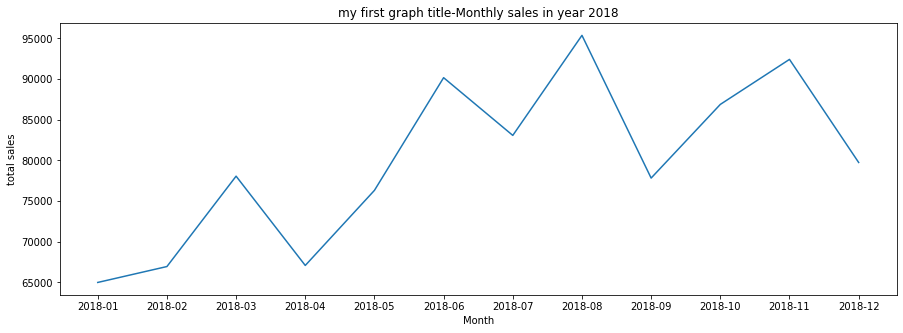

In [ ]:
monthly_sales.sort_index(ascending=True,inplace=True)
plt.plot(monthly_sales)
plt.title("my first graph title-Monthly sales in year 2018")
plt.ylabel("total sales")
plt.xlabel('Month')

Text(0.5, 0, 'Month')

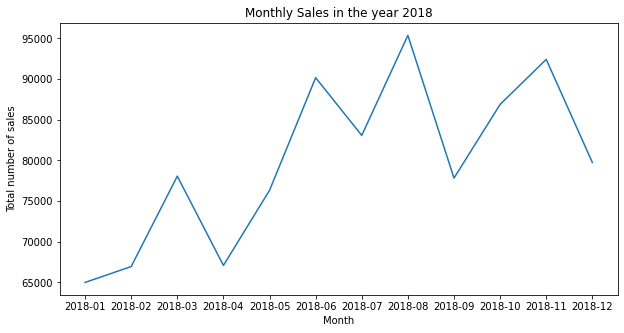

In [ ]:
# Create the plot object
plt.plot(monthly_sales_vol)

plt.title('Monthly Sales in the year 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Month')

## Second objective :  Observe the daily sales volume in the month of July 2018

In [ ]:
df=df[df['Sale Date'].dt.month==7]
df
daily_sales_figures=df['Sale Date'].value_counts()
daily_sales_figures

2018-07-27    11145
2018-07-20     8802
2018-07-06     8400
2018-07-13     6561
2018-07-31     5047
2018-07-12     3568
2018-07-30     3429
2018-07-26     2965
2018-07-02     2931
2018-07-16     2883
2018-07-23     2742
2018-07-25     2710
2018-07-19     2571
2018-07-18     2438
2018-07-05     2358
2018-07-09     2259
2018-07-11     2165
2018-07-24     2116
2018-07-04     2064
2018-07-10     1985
2018-07-17     1933
2018-07-03     1828
2018-07-28       31
2018-07-14       25
2018-07-29       25
2018-07-21       21
2018-07-15       20
2018-07-07       18
2018-07-01       18
2018-07-22       13
2018-07-08       11
Name: Sale Date, dtype: int64

In [ ]:
monthly_sales=df['Sale Date'].value_counts
monthly_sales

<bound method IndexOpsMixin.value_counts of 835       2018-07-20
1044      2018-07-27
1055      2018-07-30
1123      2018-07-25
1214      2018-07-26
             ...    
1024095   2018-07-30
1024231   2018-07-02
1024234   2018-07-20
1024267   2018-07-30
1024270   2018-07-20
Name: Sale Date, Length: 83082, dtype: datetime64[ns]>

In [ ]:
monthly_sales.plot()

AttributeError: ignored

In [ ]:
# Daily sales volume for July 2018
df = df[df['Sale Date'].dt.month == 7]

daily_sales_vol = df["Sale Date"].value_counts()

In [ ]:
daily_sales_vol

2018-07-27    11145
2018-07-20     8802
2018-07-06     8400
2018-07-13     6561
2018-07-31     5047
2018-07-12     3568
2018-07-30     3429
2018-07-26     2965
2018-07-02     2931
2018-07-16     2883
2018-07-23     2742
2018-07-25     2710
2018-07-19     2571
2018-07-18     2438
2018-07-05     2358
2018-07-09     2259
2018-07-11     2165
2018-07-24     2116
2018-07-04     2064
2018-07-10     1985
2018-07-17     1933
2018-07-03     1828
2018-07-28       31
2018-07-14       25
2018-07-29       25
2018-07-21       21
2018-07-15       20
2018-07-07       18
2018-07-01       18
2018-07-22       13
2018-07-08       11
Name: Sale Date, dtype: int64

### Creating a Line plot 

Text(0.5, 0, 'Date')

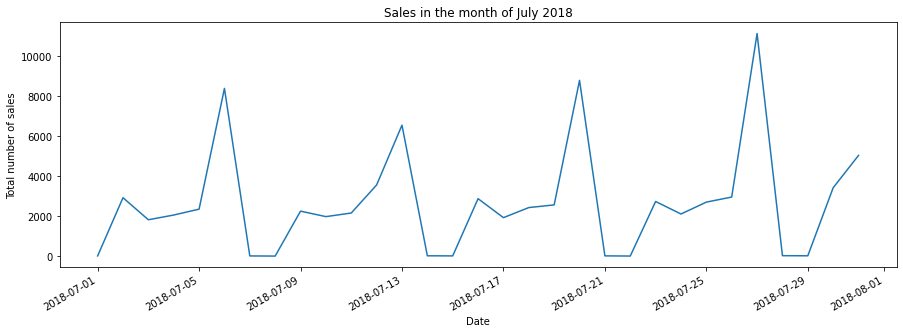

In [ ]:
# Create the plot object
daily_sales_vol.plot()

plt.title('Sales in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')
# plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
#this is my trial but alma has a better way
property_type_wise_sales=df.groupby(['Property Type'],axis=1,sort = True)
df[property_type_wise_sales]

""
835
1044
1055
1123
1214
...
1024095
1024231
1024234
1024267


In [ ]:
#alma way
#understanding: here after group by we want sales so we selected TID , this TID column appears separately
#Groupby order matters ,see below cod and code after that  
df.groupby(['Sale Date','Property Type'])['TID'].count()

Sale Date   Property Type
2018-07-01  D                   4
            F                   2
            S                   7
            T                   5
2018-07-02  D                 705
                             ... 
2018-07-30  T                 976
2018-07-31  D                1316
            F                1014
            S                1353
            T                1364
Name: TID, Length: 124, dtype: int64

In [ ]:
df.groupby(['Property Type','Sale Date'])['TID'].count()

Property Type  Sale Date 
D              2018-07-01       4
               2018-07-02     705
               2018-07-03     443
               2018-07-04     529
               2018-07-05     623
                             ... 
T              2018-07-27    3125
               2018-07-28       8
               2018-07-29       8
               2018-07-30     976
               2018-07-31    1364
Name: TID, Length: 124, dtype: int64

In [ ]:
#unstack() method as the name
daily_price=df.groupby(['Sale Date','Property Type'])['TID'].count().unstack()
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


In [ ]:
daily_price.columns

Index(['D', 'F', 'S', 'T'], dtype='object', name='Property Type')

Text(0, 0.5, 'daily price')

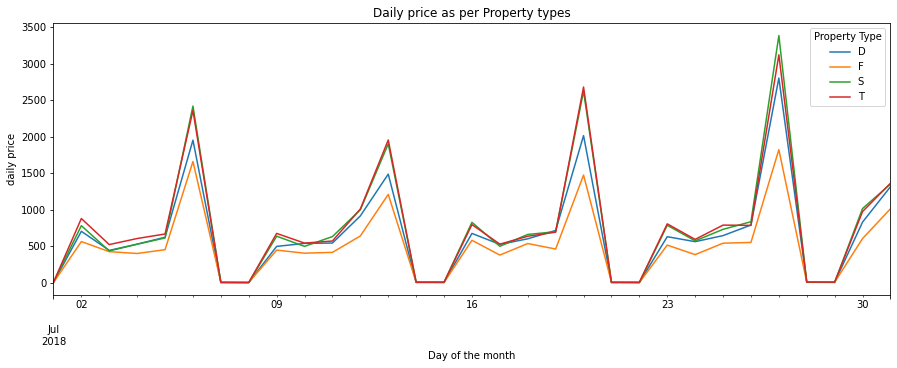

In [ ]:
#my code
daily_price.plot()
plt.title('Daily price as per Property types')
plt.xlabel('Day of the month')
plt.ylabel('daily price')

In [ ]:
df.groupby(['Property Type','Sale Date'])['TID'].count().unstack()

Sale Date,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-07,2018-07-08,2018-07-09,2018-07-10,...,2018-07-22,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-28,2018-07-29,2018-07-30,2018-07-31
Property Type,,,,,,,,,,,,,,,,,,,,,
D,4,705,443,529,623,1955,7,2,498,539,...,3,631,563,646,791,2806,10,6,831,1316
F,2,564,426,401,453,1662,6,4,447,405,...,2,516,385,542,552,1825,7,7,605,1014
S,7,782,436,528,614,2422,2,1,638,498,...,1,788,574,732,836,3389,6,4,1017,1353
T,5,880,523,606,668,2361,3,4,676,543,...,7,807,594,790,786,3125,8,8,976,1364


In [ ]:
daily_price

## Third Objective :  Comparing the daily sales volume of different property types in July

### Creating mutliple line plots in the same figure

In [ ]:
daily_price = df.groupby(['Sale Date','Property Type'])['Sale Date'].count().unstack()

In [ ]:
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


In [ ]:
df.groupby(['Sale Date','Property Type'])['Sale Date'].count()

Sale Date   Property Type
2018-07-01  D                   4
            F                   2
            S                   7
            T                   5
2018-07-02  D                 705
                             ... 
2018-07-30  T                 976
2018-07-31  D                1316
            F                1014
            S                1353
            T                1364
Name: Sale Date, Length: 124, dtype: int64

In [ ]:
daily_price.columns

Index(['D', 'F', 'S', 'T'], dtype='object', name='Property Type')

In [ ]:
daily_price


Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


Text(0.5, 0, 'Date')

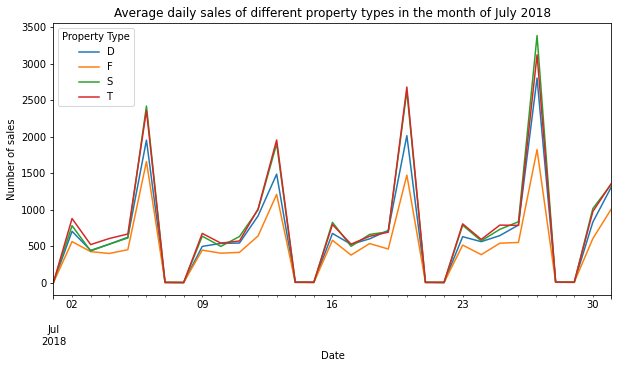

In [ ]:
###### daily_price = df.groupby(['Sale Date','Property Type'])['Sale Date'].count().unstack()
daily_price.plot()

plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
# plt.rcParams['figure.figsize'] = (10, 5)

### Creating a bar plot

* A bar chart is really helpful when we want to see for example the total sales volume by different Property types. 
* To check how a particular variable varies across different categories/groups of another variable we use a Bar plot

* To plot a horizontal bar chart, we set the argument kind='barh'. The sort_values() function sorts the values in ascending order by default.

In [ ]:
df['Price']

835         84000
1044       228000
1055       330000
1123       140000
1214       375000
            ...  
1024095    483000
1024231    219000
1024234    332500
1024267    637500
1024270    128000
Name: Price, Length: 83082, dtype: int64

## Fourth Objective :  Draw comparison among different property types in terms of sales

In [ ]:
sales_by_type=df["Property Type"].value_counts()
sales_by_type

T    23630
S    23501
D    20406
F    15545
Name: Property Type, dtype: int64

In [ ]:
# Number of residential property transactions in Aug 2018 by property type
sales_by_type = df["Property Type"].value_counts()
sales_by_type

T    23630
S    23501
D    20406
F    15545
Name: Property Type, dtype: int64

Text(0.5, 0, 'Property Type')

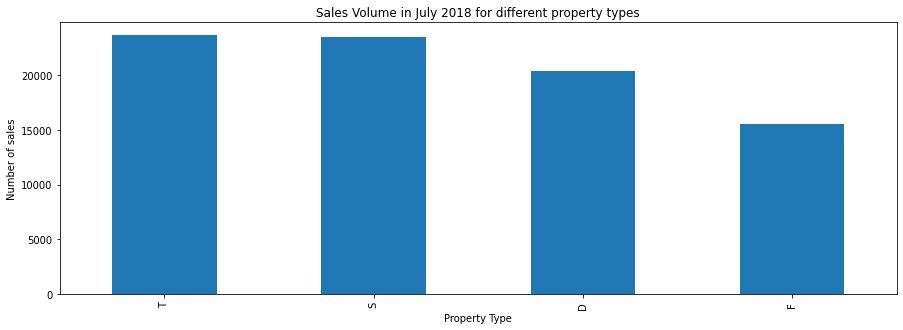

In [ ]:
sales_by_type.plot(kind='bar')
plt.title('Sales Volume in July 2018 for different property types')
plt.ylabel('Number of sales')
plt.xlabel('Property Type')

Text(0.5, 0, 'Property Type')

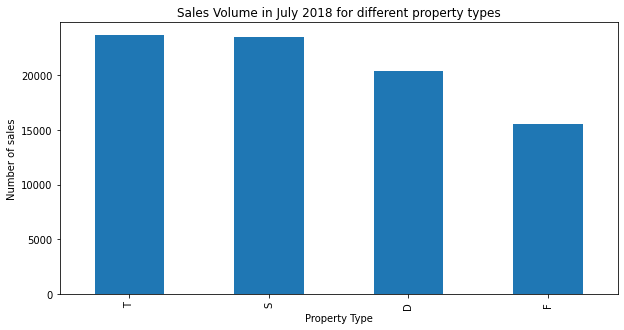

In [ ]:
# Create the plot object
sales_by_type.plot(kind='bar')

plt.title('Sales Volume in July 2018 for different property types')
plt.ylabel('Number of sales')
plt.xlabel('Property Type')

# Set the display figure size using rcParams method 
# plt.rcParams['figure.figsize'] = (10, 5)

## Fourth Objective : Average house prices for different property types in July

## Using an Axes instance from Matplotlib

In [ ]:
#funda of groupby, first use groupby on a column then directly write column name in [] and apply method on it that you want, example avg,sum
avg_price_ppt_type=df.groupby(['Property Type'])['Price'].mean()

In [ ]:
avg_price_ppt_type = df.groupby(['Property Type'])['Price'].mean()

In [ ]:
avg_price_ppt_type

Property Type
D    420870.312359
F    306578.147507
S    260353.586613
T    248855.367203
Name: Price, dtype: float64

Text(0, 0.5, 'Average prices ')

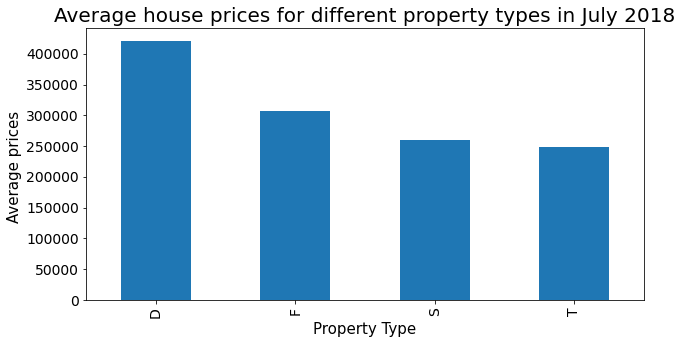

In [ ]:
# Create the figure object 
ax = avg_price_ppt_type.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Average house prices for different property types in July 2018", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Property Type", fontsize = 15)
ax.set_ylabel("Average prices ", fontsize = 15)

In [ ]:
df.describe()

,Price
count,8.308200e+04
mean,3.051571e+05
std,3.309047e+05
min,1.000000e+00
25%,1.520000e+05
50%,2.350000e+05
75%,3.630000e+05
max,2.121000e+07


## Box plot

* Also called as **box and whisker plot**, is a way of showing the distribution of data in a five-number summary.

* Below we will create a box plot which shows the price distribution for all the four different property types.

## Fifth Objective : Obtain the average house price distribution for different property types

In [ ]:
df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack()

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,540000.000000,109000.000000,172571.428571,217400.000000
2018-07-02,445515.668085,350084.714539,270838.773657,255916.592045
2018-07-03,447700.440181,373247.507042,247046.855505,269273.124283
2018-07-04,438009.792060,334057.576060,280296.412879,242835.457096
2018-07-05,458506.836276,333304.015453,269661.234528,245529.871257
2018-07-06,388179.344246,280558.135379,248347.932700,223573.152478
2018-07-07,383420.714286,267990.833333,157500.000000,490333.333333
2018-07-08,213500.000000,147123.750000,245000.000000,116250.000000
2018-07-09,401749.847390,301908.429530,265197.501567,291172.751479


Text(0.5, 0, 'Property Type')

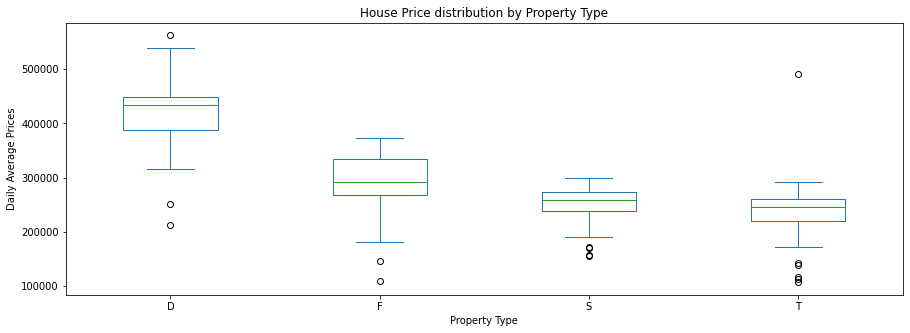

In [ ]:
df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack().plot(kind='box')
plt.title('House Price distribution by Property Type')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

Text(0.5, 0, 'Property Type')

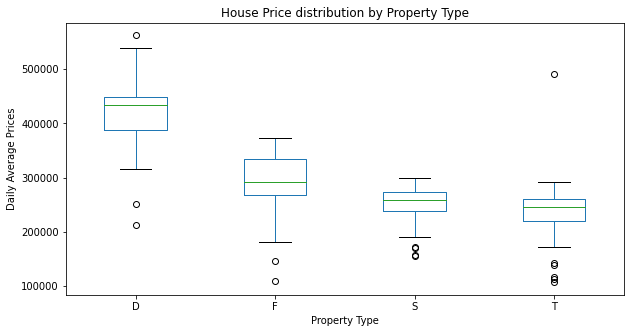

In [ ]:
# Price distribution box plot
df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack().plot(kind="box")
plt.title('House Price distribution by Property Type')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

Whiskers are set at 1.5 * IQR ( Q3 - Q1)

# Exploring Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

## Speed Dating Dataset

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
dating_data = pd.read_csv("/content/drive/MyDrive/Speed Dating Data.csv", encoding = 'unicode_escape')

In [ ]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dating_data.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [ ]:
list(dating_data.columns.values)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

In [ ]:
dating_data.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

# Histogram

In [ ]:
import numpy as np

In [ ]:
#boolean question
~dating_data['age'].isna()


0       True
1       True
2       True
3       True
4       True
        ... 
8373    True
8374    True
8375    True
8376    True
8377    True
Name: age, Length: 8378, dtype: bool

In [ ]:
dating_data[~dating_data['age'].isna()]


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [ ]:
age.values

array([21., 21., 21., ..., 25., 25., 25.])

In [ ]:
dating_data[~dating_data['age'].isna()]['age']

0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
        ... 
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8283, dtype: float64

Text(0, 0.5, 'Frequency')

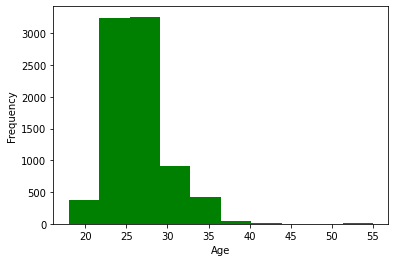

In [ ]:
#my code
import matplotlib.pyplot as plt
age=dating_data[~dating_data['age'].isna()]['age']
plt.hist(age.values,color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [ ]:
dating_data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


Text(0, 0.5, 'Frequency')

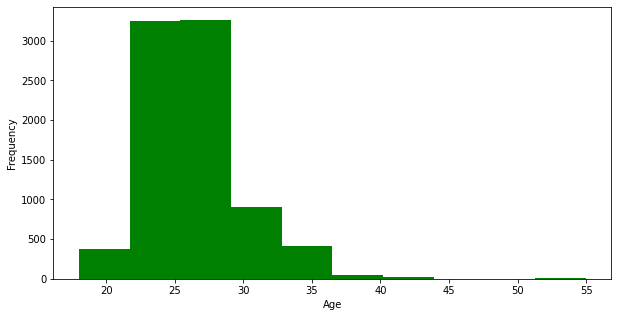

In [ ]:
age = dating_data[~dating_data['age'].isna()]['age']
plt.hist(age.values, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


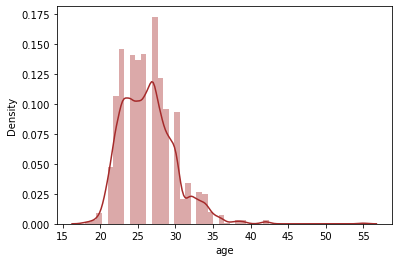

In [ ]:
sns.distplot(age,hist=True,color='brown')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


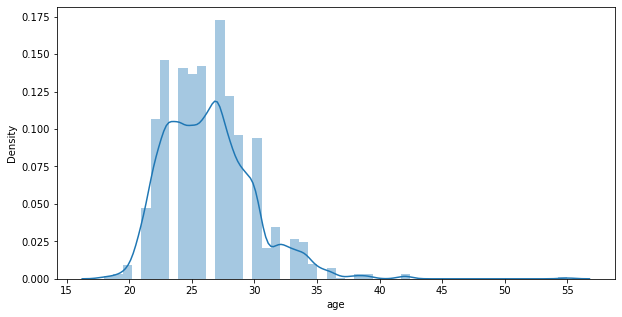

In [ ]:
sns.distplot(age, hist=True)

# Understanding correlation

In [ ]:
# Positively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 3, 4, 6, 6, 7, 8, 9, 10, 11]

In [ ]:
# Negatively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 10, 9, 8, 7, 6, 6, 4, 3, 2]

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 10, 9, 8, 7, 6, 6, 4, 3, 2]
#above is negatively correlated
df=pd.DataFrame(data={'x':x,'y':y})

In [ ]:
df

,x,y
0,1,11
1,2,10
2,3,9
3,4,8
4,5,7
5,6,6
6,7,6
7,8,4
8,9,3
9,10,2


In [ ]:
# Zero correlation
x = [1, 2, 1, 2]
y = [1, 2, 2, 1]

In [ ]:
df = pd.DataFrame(data={'x': x, 'y': y})

In [ ]:
df

,x,y
0,1,11
1,2,10
2,3,9
3,4,8
4,5,7
5,6,6
6,7,6
7,8,4
8,9,3
9,10,2


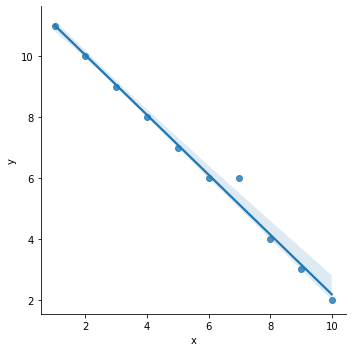

In [ ]:
sns.lmplot(x='x',y='y',data=df)


In [ ]:
df.corr()
#see x and y are almost 100% negatively correlated

,x,y
x,1.000000,-0.994558
y,-0.994558,1.000000


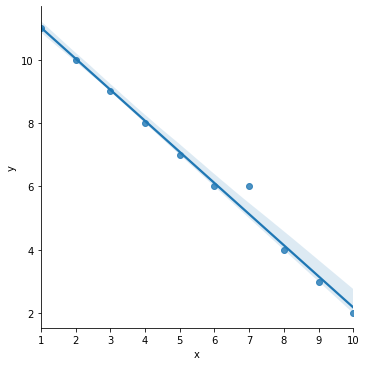

In [ ]:
sns.lmplot(x='x', y='y', data=df)

In [ ]:
df.corr()

,x,y
x,1.000000,-0.994558
y,-0.994558,1.000000


# Correlation Heatmap

In [ ]:
dating_data_df = dating_data[['gender', 'shopping', 'gaming', 'concerts', 'music']]

In [ ]:
corr_df=dating_data_df.corr()
#corr_df = dating_data_df.corr()

In [ ]:
corr_df

,gender,shopping,gaming,concerts,music
gender,1.000000,-0.330718,0.219619,-0.128339,-0.076850
shopping,-0.330718,1.000000,0.093467,0.205389,0.208329
gaming,0.219619,0.093467,1.000000,0.098806,0.043301
concerts,-0.128339,0.205389,0.098806,1.000000,0.655728
music,-0.076850,0.208329,0.043301,0.655728,1.000000


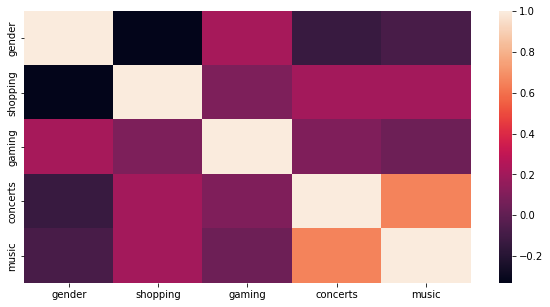

In [ ]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

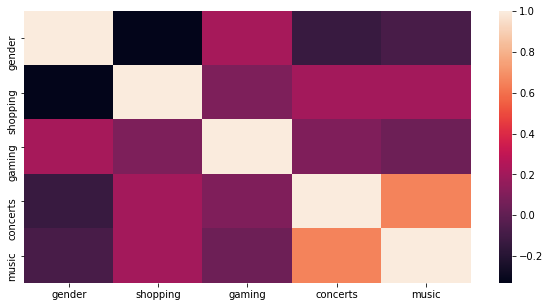

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

### Make the map more intuitive

* Set the minimum value for the color scale at -1
* Make your heatmap more visually pleasing : https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
* Annotate values

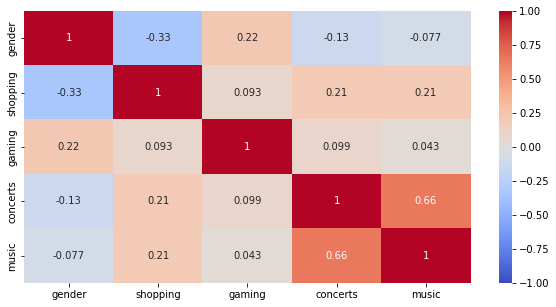

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dating_data_df.corr(),vmin=-1,cmap='coolwarm',annot=True)

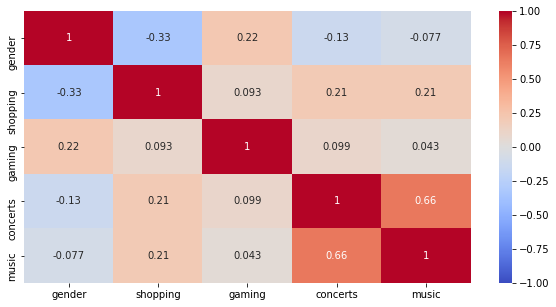

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dating_data_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

# Two-way Plots

In [ ]:
dating_data_df.head()

,gender,shopping,gaming,concerts,music
0,0,8.0,1.0,10.0,9.0
1,0,8.0,1.0,10.0,9.0
2,0,8.0,1.0,10.0,9.0
3,0,8.0,1.0,10.0,9.0
4,0,8.0,1.0,10.0,9.0


In [ ]:
dating_data_df.shape

(8378, 5)

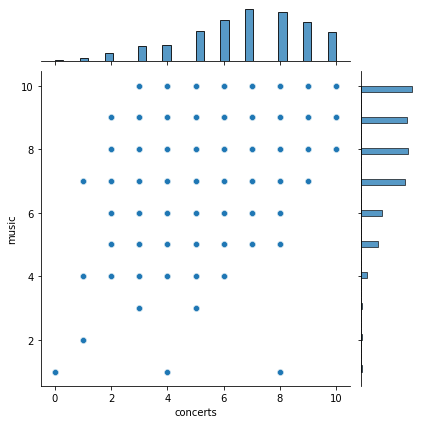

In [ ]:
sns.jointplot(x='concerts',y='music',data=dating_data_df)

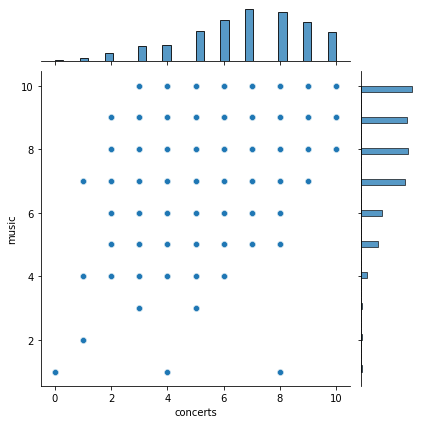

In [ ]:
sns.jointplot(x='concerts', y='music', data=dating_data_df)

In [ ]:
dating_data_df[(dating_data_df['concerts'] == 6) & (dating_data_df['music'] == 8)]

,gender,shopping,gaming,concerts,music
130,1,6.0,8.0,6.0,8.0
131,1,6.0,8.0,6.0,8.0
132,1,6.0,8.0,6.0,8.0
133,1,6.0,8.0,6.0,8.0
134,1,6.0,8.0,6.0,8.0
...,...,...,...,...,...
7801,0,4.0,5.0,6.0,8.0
7802,0,4.0,5.0,6.0,8.0
7803,0,4.0,5.0,6.0,8.0
7804,0,4.0,5.0,6.0,8.0
